<a href="https://colab.research.google.com/github/Rishabh5752/MHD-DAIC-/blob/main/DAIC_ML_DL_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Load the dataset
data = pd.read_csv('merged_data.csv')

# Separate features and target
X = data.drop(['Participant_ID', 'PHQ_8Total'], axis=1).values
y = data['PHQ_8Total'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for CNN input (assuming 1D convolution)
# Number of time steps (features)
n_steps = X_train.shape[1]

# Reshape input data to be 3D [samples, time steps, features]
X_train_reshaped = X_train.reshape((X_train.shape[0], n_steps, 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], n_steps, 1))

# Build the CNN model
model = Sequential()

# Add 1D convolutional layers
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_steps, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

# Add Dense layers for classification
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(1))  # Single neuron for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10000, batch_size=32, validation_data=(X_test_reshaped, y_test))


Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 79ms/step - loss: 0.8721 - accuracy: 0.2045 - val_loss: 63.0050 - val_accuracy: 0.1667
Epoch 1208/10000
2/2 [==============================] - 0s 67ms/step - loss: 1.5630 - accuracy: 0.2500 - val_loss: 62.3938 - val_accuracy: 0.1667
Epoch 1209/10000
2/2 [==============================] - 0s 55ms/step - loss: 1.3200 - accuracy: 0.2273 - val_loss: 59.3459 - val_accuracy: 0.1667
Epoch 1210/10000
2/2 [==============================] - 0s 53ms/step - loss: 1.8344 - accuracy: 0.2500 - val_loss: 57.7216 - val_accuracy: 0.1667
Epoch 1211/10000
2/2 [==============================] - 0s 99ms/step - loss: 0.6526 - accuracy: 0.2955 - val_loss: 57.7083 - val_accuracy: 0.1667
Epoch 1212/10000
2/2 [==============================] - 0s 72ms/step - loss: 0.7176 - accuracy: 0.2500 - val_loss: 57.7251 - val_accuracy: 0.1667
Epoch 1213/10000
2/2 [==============================] - 0s 63ms/step - loss: 0.6935 - accu

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
data = pd.read_csv('merged_data.csv')

# Separate features and target
X = data.drop(['Participant_ID', 'PHQ_8Total'], axis=1).values
y = data['PHQ_8Total'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = Sequential()

# Add Dense layers
n_features = X_train.shape[1]
model.add(Dense(64, activation='relu', input_shape=(n_features,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Single neuron for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, mae, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

# Predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

Epoch 1/100
2/2 [==============================] - 8s 411ms/step - loss: 49.8339 - mae: 4.8138 - accuracy: 0.1591 - val_loss: 65.3345 - val_mae: 4.8793 - val_accuracy: 0.2500
Epoch 2/100
2/2 [==============================] - 0s 89ms/step - loss: 41.4930 - mae: 4.1991 - accuracy: 0.1591 - val_loss: 61.3147 - val_mae: 4.7834 - val_accuracy: 0.1667
Epoch 3/100
2/2 [==============================] - 0s 64ms/step - loss: 35.4199 - mae: 3.7362 - accuracy: 0.1136 - val_loss: 57.7136 - val_mae: 4.7306 - val_accuracy: 0.1667
Epoch 4/100
2/2 [==============================] - 0s 62ms/step - loss: 30.2112 - mae: 3.2670 - accuracy: 0.2045 - val_loss: 54.2016 - val_mae: 4.7283 - val_accuracy: 0.1667
Epoch 5/100
2/2 [==============================] - 0s 114ms/step - loss: 25.5730 - mae: 2.9266 - accuracy: 0.2500 - val_loss: 51.1427 - val_mae: 4.7635 - val_accuracy: 0.1667
Epoch 6/100
2/2 [==============================] - 0s 72ms/step - loss: 22.1817 - mae: 2.6537 - accuracy: 0.2500 - val_loss: 48.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Load the dataset (replace 'merged_data.csv' with your actual dataset file)
data = pd.read_csv('merged_data.csv')

# Separate features and target
X = data.drop(['Participant_ID', 'PHQ_8Total'], axis=1).values
y = data['PHQ_8Total'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize lists to store MSE and R-squared scores
mse_scores = []
r2_scores = []

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse:.4f}, R-squared: {rf_r2:.4f}")
mse_scores.append(rf_mse)
r2_scores.append(rf_r2)

# XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print(f"XGBoost MSE: {xgb_mse:.4f}, R-squared: {xgb_r2:.4f}")
mse_scores.append(xgb_mse)
r2_scores.append(xgb_r2)

# Support Vector Machines (SVM)
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)
print(f"SVM MSE: {svm_mse:.4f}, R-squared: {svm_r2:.4f}")
mse_scores.append(svm_mse)
r2_scores.append(svm_r2)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
print(f"KNN MSE: {knn_mse:.4f}, R-squared: {knn_r2:.4f}")
mse_scores.append(knn_mse)
r2_scores.append(knn_r2)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print(f"Linear Regression MSE: {lr_mse:.4f}, R-squared: {lr_r2:.4f}")
mse_scores.append(lr_mse)
r2_scores.append(lr_r2)

# AdaBoost Regressor
adaboost_model = AdaBoostRegressor(random_state=42)
adaboost_model.fit(X_train, y_train)
adaboost_predictions = adaboost_model.predict(X_test)
adaboost_mse = mean_squared_error(y_test, adaboost_predictions)
adaboost_r2 = r2_score(y_test, adaboost_predictions)
print(f"AdaBoost MSE: {adaboost_mse:.4f}, R-squared: {adaboost_r2:.4f}")
mse_scores.append(adaboost_mse)
r2_scores.append(adaboost_r2)

# Compare MSE and R-squared scores
best_model_index_mse = mse_scores.index(min(mse_scores))
best_model_index_r2 = r2_scores.index(max(r2_scores))

print("\nBest model based on MSE:", ["Random Forest", "XGBoost", "SVM", "KNN", "Linear Regression", "AdaBoost"][best_model_index_mse])
print("Best model based on R-squared:", ["Random Forest", "XGBoost", "SVM", "KNN", "Linear Regression", "AdaBoost"][best_model_index_r2])

Random Forest MSE: 51.9589, R-squared: -0.2579
XGBoost MSE: 98.0127, R-squared: -1.3729
SVM MSE: 42.3353, R-squared: -0.0249
KNN MSE: 60.1100, R-squared: -0.4553
Linear Regression MSE: 83.5283, R-squared: -1.0222
AdaBoost MSE: 54.1057, R-squared: -0.3099

Best model based on MSE: SVM
Best model based on R-squared: SVM


In [ ]:
#Grid Search CV
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (replace 'merged_data.csv' with your actual dataset file)
data = pd.read_csv('merged_data.csv')

# Separate features and target
X = data.drop(['Participant_ID', 'PHQ_8Total'], axis=1).values
y = data['PHQ_8Total'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameters grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best estimator on test data
best_predictions = best_estimator.predict(X_test)
best_mse = mean_squared_error(y_test, best_predictions)
best_r2 = r2_score(y_test, best_predictions)

print(f"Best Parameters: {best_params}")
print(f"Best MSE: {best_mse:.4f}")
print(f"Best R-squared: {best_r2:.4f}")


Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Best MSE: 46.1390
Best R-squared: -0.1170


In [ ]:
data.describe()

,Participant_ID,PHQ_8Total,0,1,2,3,4,5,6,7,...,980,981,982,983,984,985,986,987,988,989
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.000000,56.000000,56.000000,56.0,...,56.00000,56.00000,56.00000,56.0,56.000000,56.000000,56.000000,56.0,56.000000,56.000000
mean,464.071429,4.714286,0.821429,0.821429,0.821429,255.0,1.000000,1.000000,1.000000,255.0,...,0.50000,0.50000,0.50000,255.0,0.785714,0.785714,0.785714,255.0,1.178571,1.178571
std,16.739564,5.466308,6.147009,6.147009,6.147009,0.0,4.752033,4.752033,4.752033,0.0,...,3.03315,3.03315,3.03315,0.0,5.362205,5.362205,5.362205,0.0,7.231515,7.231515
min,436.000000,0.000000,0.000000,0.000000,0.000000,255.0,0.000000,0.000000,0.000000,255.0,...,0.00000,0.00000,0.00000,255.0,0.000000,0.000000,0.000000,255.0,0.000000,0.000000
25%,449.750000,1.000000,0.000000,0.000000,0.000000,255.0,0.000000,0.000000,0.000000,255.0,...,0.00000,0.00000,0.00000,255.0,0.000000,0.000000,0.000000,255.0,0.000000,0.000000
50%,464.500000,3.000000,0.000000,0.000000,0.000000,255.0,0.000000,0.000000,0.000000,255.0,...,0.00000,0.00000,0.00000,255.0,0.000000,0.000000,0.000000,255.0,0.000000,0.000000
75%,478.250000,7.000000,0.000000,0.000000,0.000000,255.0,0.000000,0.000000,0.000000,255.0,...,0.00000,0.00000,0.00000,255.0,0.000000,0.000000,0.000000,255.0,0.000000,0.000000
max,492.000000,19.000000,46.000000,46.000000,46.000000,255.0,30.000000,30.000000,30.000000,255.0,...,22.00000,22.00000,22.00000,255.0,40.000000,40.000000,40.000000,255.0,53.000000,53.000000


In [ ]:
data.head()

,Participant_ID,PHQ_8Total,0,1,2,3,4,5,6,7,...,980,981,982,983,984,985,986,987,988,989
0,436,0,0,0,0,255,0,0,0,255,...,0,0,0,255,0,0,0,255,0,0
1,437,0,0,0,0,255,0,0,0,255,...,0,0,0,255,0,0,0,255,0,0
2,438,2,0,0,0,255,0,0,0,255,...,0,0,0,255,4,4,4,255,0,0
3,439,1,0,0,0,255,0,0,0,255,...,0,0,0,255,0,0,0,255,0,0
4,440,19,0,0,0,255,0,0,0,255,...,0,0,0,255,0,0,0,255,0,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (Replace 'merged_data.csv' with your dataset file)
data = pd.read_csv('merged_data.csv')

# Separate features and target
X = data.drop(['Participant_ID', 'PHQ_8Total'], axis=1).values
y = data['PHQ_8Total'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Machine': SVR(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'XGBoost': XGBRegressor(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    # Predict on test set
    predictions = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"{name} - Mean Squared Error: {mse:.4f}, R-squared: {r2:.4f}")

# Optionally, perform hyperparameter tuning using techniques like GridSearchCV or RandomizedSearchCV for each model.


Training Random Forest...
Random Forest - Mean Squared Error: 51.9589, R-squared: -0.2579
Training Support Vector Machine...
Support Vector Machine - Mean Squared Error: 42.3353, R-squared: -0.0249
Training Decision Tree...
Decision Tree - Mean Squared Error: 116.3333, R-squared: -1.8164
Training Linear Regression...
Linear Regression - Mean Squared Error: 83.5283, R-squared: -1.0222
Training XGBoost...
XGBoost - Mean Squared Error: 98.0127, R-squared: -1.3729


   Participant_ID  PHQ_8Total  0  1  2    3  4  5  6    7  ...  980  981  982  \
0             436           0  0  0  0  255  0  0  0  255  ...    0    0    0   
1             437           0  0  0  0  255  0  0  0  255  ...    0    0    0   
2             438           2  0  0  0  255  0  0  0  255  ...    0    0    0   
3             439           1  0  0  0  255  0  0  0  255  ...    0    0    0   
4             440          19  0  0  0  255  0  0  0  255  ...    0    0    0   

   983  984  985  986  987  988  989  
0  255    0    0    0  255    0    0  
1  255    0    0    0  255    0    0  
2  255    4    4    4  255    0    0  
3  255    0    0    0  255    0    0  
4  255    0    0    0  255    0    0  

[5 rows x 992 columns]
       Participant_ID  PHQ_8Total          0          1          2      3  \
count       56.000000   56.000000  56.000000  56.000000  56.000000   56.0   
mean       464.071429    4.714286   0.821429   0.821429   0.821429  255.0   
std         16.739564   

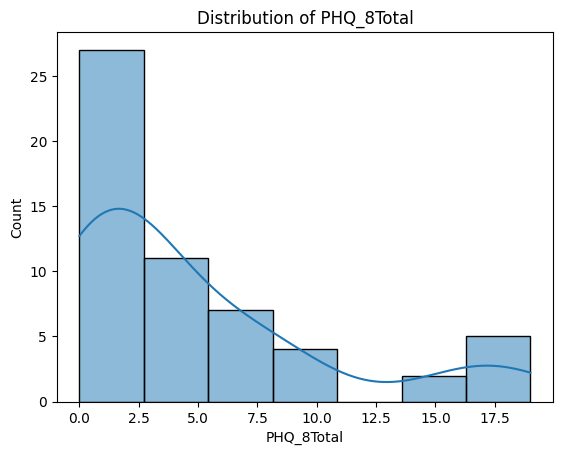

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (Replace 'merged_data.csv' with your dataset file)
data = pd.read_csv('merged_data.csv')

# Explore data
print(data.head())  # Display the first few rows
print(data.describe())  # Summary statistics

# Visualize the distribution of 'PHQ_8Total'
sns.histplot(data['PHQ_8Total'], kde=True)
plt.xlabel('PHQ_8Total')
plt.title('Distribution of PHQ_8Total')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop(['Participant_ID', 'PHQ_8Total'], axis=1).values
y = data['PHQ_8Total'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameters grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best estimator on test data
best_predictions = best_estimator.predict(X_test)
best_mse = mean_squared_error(y_test, best_predictions)
best_r2 = r2_score(y_test, best_predictions)

print(f"Best Parameters: {best_params}")
print(f"Best MSE: {best_mse:.4f}")
print(f"Best R-squared: {best_r2:.4f}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Best MSE: 46.1390
Best R-squared: -0.1170
